In [17]:
import pickle
import matplotlib.pylab as plt
%matplotlib inline  

from okgtreg.Parameters import *
from okgtreg.okgtreg import *

The followings are the true group structures and different values for the regularization parameters:

In [3]:
group1 = Group([1], [2], [3], [4], [5], [6], [7], [8], [9], [10], name='group1')
group2 = Group([1, 2], [3, 4], [5, 6], [7, 8], [9, 10], name='group2')
group3 = Group([1, 2, 3], [4, 5, 6], [7, 8, 9], [10], name='group3')
group4 = Group([1, 2, 3], [4, 5, 6], [7, 8, 9, 10], name='group4')
group5 = Group([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], name='group5')
group6 = Group([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], name='group6')

nEps = 30  # mean has 16 cores, leave 2 for the other people
lnEpsGrid = (np.arange(nEps) + 1) * (-1.)
epsGrid = np.exp(lnEpsGrid)

Un-pickle the simulation results and plot the mean curves of $R^2$:

In [12]:
filenames = ['sim4-group' + str(i) + '.pkl' for i in [2,3,4,5,6]]
folder = 'okgtreg/simulation/sim4_11212015/'

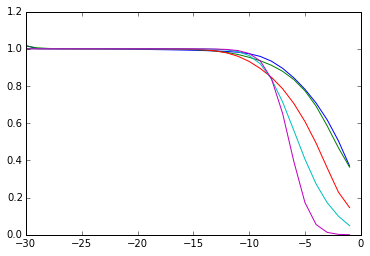

In [18]:
# Plot mean curve for each group structure
for filename in filenames:
    # filename = 'sim4-group4.pkl'

    resList = pickle.load(open(folder+filename, 'r'))

    x = resList[0].keys()
    y = np.vstack([res.values() for res in resList]).mean(0)

    # Curve: log-eps vs average R2
    plt.plot(x, y)

Un-pickle the simulation results and make boxplots for $R^2$:

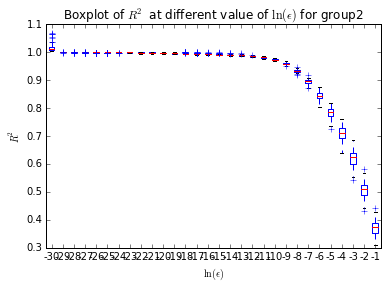

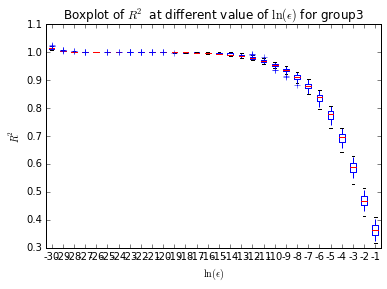

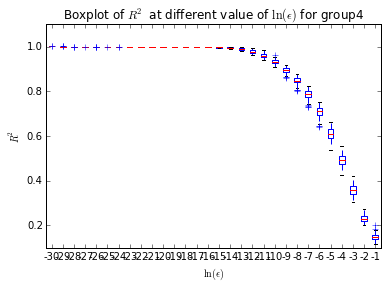

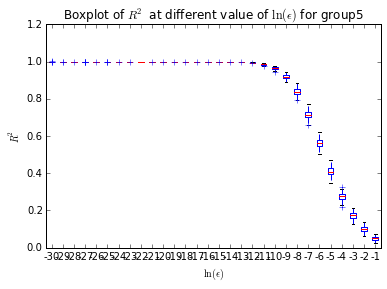

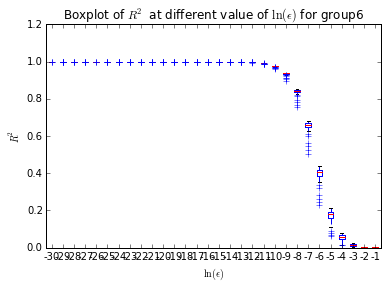

In [23]:
# Plot box plot for each group structure
for i in [2,3,4,5,6]:
    # i = 3  # group index
    plt.figure(i)
    filename = filenames[i-2]

    resList = pickle.load(open(folder+filename, 'r'))
    x = resList[0].keys()
    labels = [int(val) for val in x]
    r2 = np.vstack([res.values() for res in resList])
    plt.boxplot(r2, labels=labels)
    plt.title(r'Boxplot of $R^2$ at different value of $\ln(\epsilon)$ for group' + str(i))
    plt.xlabel(r'$\ln(\epsilon)$')
    plt.ylabel(r'$R^2$')
    plt.show()

# Simulation results:

** The conclusions here are based on the simulation results from Group 2-6. The simulation
for Group 1 is still running on mean by the time this report is written. **

Two types of plots are made for the simulation results:

    1) Mean curve of estiamted R2 vs ln(eps) for each group structure;

    2) Boxplot of estimated R2 vs ln(eps) for each group structure.

The former is used to investigate the average effect of regularization parameter on R2, while
the latter is used to show the estimation variability for a given model at different level of
the regularization coefficient.

The followings are the observational conclusions:

1. From the mean curve plot, it seems that the performance of OKGT, in terms of R2 estimation,
   is quite stable when "eps" is small until ln(eps) = -13 (i.e. eps = 2.260329e-06). After that, the
   estimation deteriorates as eps becomes larger. This justifies the usage of 1e-6 as the default
   value for eps in our OKGT implementation.

   ** The performance of OKGT estimation may also depend on sample size. But this is beyond
   the scope of the current simulation. **

2. From the mean curve plot, it can also be noticed that the degeneration speed varies among different
   models. Group 6 has only one group, which displays the fastest degeneration. Group 2 has the
   largest number of groups, whose degeneration speed is the slowest. So it seems that the effect
   of eps is more prominent when there are fewer groups.

3. From the boxplots, we can see the variance of R2 estimates increases when ln(eps) exceed -13.
   This in general the case, however, for Group 2, R2 estimates show greater variability at ln(eps) = -30.